In [1]:
import pandas as pd
import openpyxl
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import levene

import warnings
warnings.simplefilter("ignore")

In [2]:
file_path = os.path.join(os.getcwd(), 'datasets', 'qa_data.xlsx')

In [3]:
movement_a_b_home = pd.read_excel(file_path, sheet_name='Movement A to B to Home')

movement_a_b_home.rename(columns={
    "Time to A ": "Time to A",
    "Time to B ": "Time to B",
    "Time home": "Time to Home"
}, inplace=True)

movement_a_b_home.head(15)

,Path,Trial,Time to B,Time to A,Time to Home,Total
0,2,1,73.49,66.99,25.63,166.11
1,2,2,63.06,48.68,31.36,143.10
2,2,3,47.84,83.15,44.98,175.97
3,2,4,35.90,55.04,39.16,130.10
4,2,5,57.31,57.52,38.67,153.50
5,2,6,43.44,45.15,42.86,131.45
6,2,7,51.72,37.59,24.24,113.55
7,2,8,41.67,33.24,24.41,99.32
8,2,9,41.49,54.33,26.14,121.96
9,2,10,43.03,45.49,28.34,116.86


In [4]:
movement_b_a_home = pd.read_excel(file_path, sheet_name='Movement B to A to Home')

movement_b_a_home.rename(columns={
    "Time to A ": "Time to A",
    "Time to B ": "Time to B",
    "Time home": "Time to Home"
}, inplace=True)


movement_b_a_home.head(15)

,Path,Trial,Time to A,Time to B,Time to Home,Total
0,1,1,22.72,28.80,36.45,87.97
1,1,2,14.28,24.55,41.07,79.90
2,1,3,29.61,22.61,55.83,108.05
3,1,4,28.05,24.40,46.00,98.45
4,1,5,25.40,30.37,54.65,110.42
5,1,6,24.28,38.41,49.14,111.83
6,1,7,24.10,24.77,45.34,94.21
7,1,8,24.68,32.81,44.68,102.17
8,1,9,27.40,32.87,50.34,110.61
9,1,10,23.41,25.40,76.00,124.81


In [5]:
bot_app_integration = pd.read_excel(file_path, sheet_name='Bot WebApp Integration Tests')
bot_app_integration.head(15)

,Trial,Moving,Moving on App,Cleaning,Cleaning on App,Complete,Completed on App,Moving_diff,Cleaning_diff,Complete_diff
0,1,7.48,7.74,28.21,29.65,34.71,34.80,0.26,1.44,0.09
1,2,9.46,9.71,15.28,16.64,21.42,21.54,0.25,1.36,0.12
2,3,8.39,8.63,11.76,13.19,26.65,26.82,0.24,1.43,0.17
3,4,7.43,7.70,21.03,22.34,27.81,28.04,0.27,1.31,0.23
4,5,8.90,9.13,12.09,13.43,18.39,18.58,0.23,1.34,0.19


In [6]:
cleaning_head_effectiveness = pd.read_excel(file_path, sheet_name='Cleaning head effectiveness')
cleaning_head_effectiveness.head(15)

small_debris_stats = [
    3/10, 5/10, 4/10, 5/10,
    3/10, 5/10, 4/10, 2/10,
    3/10, 5/10
]

big_debris_stats = [
    3/10, 2/10, 4/10, 2/10,
    3/10, 2/10, 3/10, 6/10,
    4/10, 2/10
]

cleaning_head_effectiveness = cleaning_head_effectiveness[1:]

cleaning_head_effectiveness['smaller debris'] = small_debris_stats
cleaning_head_effectiveness['bigger debris'] = big_debris_stats

cleaning_head_effectiveness['smaller debris'] = cleaning_head_effectiveness['smaller debris'].apply(lambda x: x*10).astype(int)
cleaning_head_effectiveness['bigger debris'] = cleaning_head_effectiveness['bigger debris'].apply(lambda x: x*10).astype(int)

display(cleaning_head_effectiveness)

cleaning_head_effectiveness.rename(columns={
    "smaller debris ": "Smaller Debris",
    "bigger debris ": "Bigger Debris"
}, inplace=True)



,Cleaning head reliability when on keyboard,smaller debris,bigger debris
1,1,3,3
2,2,5,2
3,3,4,4
4,4,5,2
5,5,3,3
6,6,5,2
7,7,4,3
8,8,2,6
9,9,3,4
10,10,5,2


In [7]:
rail_extension = pd.read_excel(file_path, sheet_name='Rail extension tests')
rail_extension.head(25)
rail_extension = rail_extension[:-3]

In [8]:
rail_retraction = pd.read_excel(file_path, sheet_name='Rail retraction tests')
rail_retraction.head(25)
rail_retraction = rail_retraction[:-3]

In [9]:
def calc_mean_median_std_ci(df, column):
    mean = float(df[column].mean().round(2))
    median = float(df[column].median().round(2))
    std = float(df[column].std().round(2))
    # 95% confidence interval
    ci = float((1.96 * std / np.sqrt(len(df[column]))).round(3))
    return mean, median, std, ci

Movement Test: A to B to Home

In [10]:
print("Movement A to B to Home")
print("Stage: Mean - Median - Std - 95% CI")
print(f"Time to A (s): {calc_mean_median_std_ci(movement_a_b_home, 'Time to A')}")
print(f"Time to B (s): {calc_mean_median_std_ci(movement_a_b_home, 'Time to B')}")
print(f"Time to Home (s): {calc_mean_median_std_ci(movement_a_b_home, 'Time to Home')}")
print(f"Total (s): {calc_mean_median_std_ci(movement_a_b_home, 'Total')}")

Movement A to B to Home
Stage: Mean - Median - Std - 95% CI
Time to A (s): (52.72, 51.5, 14.51, 8.993)
Time to B (s): (49.9, 45.64, 11.62, 7.202)
Time to Home (s): (32.58, 29.85, 8.06, 4.996)
Total (s): (135.19, 130.77, 24.32, 15.074)


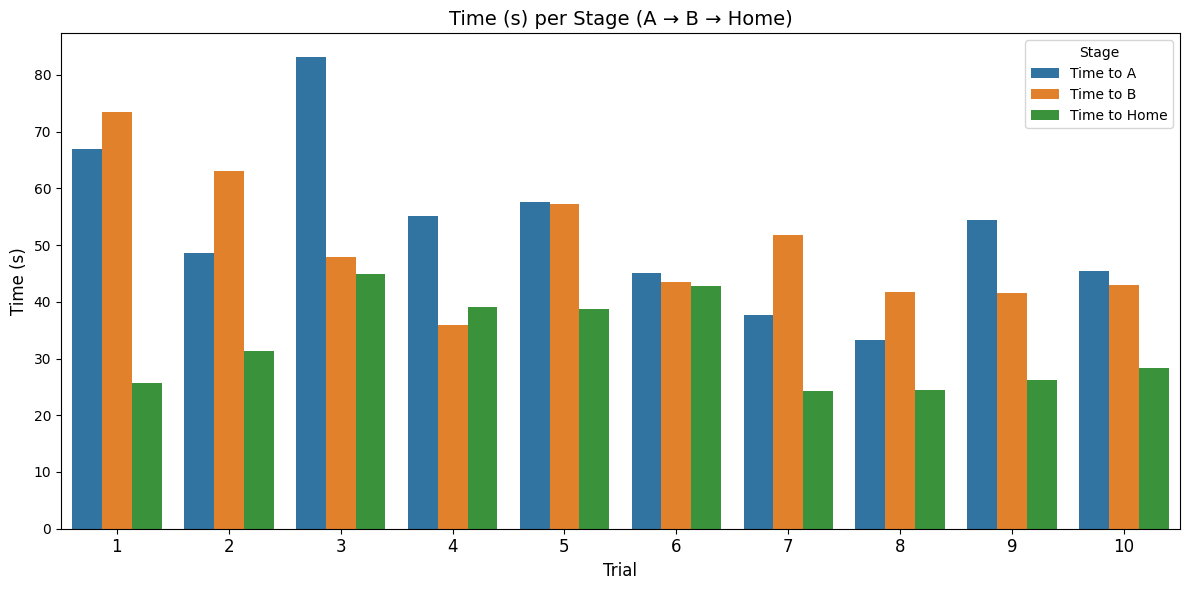

In [11]:
a_b_home_melted = movement_a_b_home[["Time to A", "Time to B", "Time to Home"]].melt(var_name="Stage", value_name="Time")

a_b_home_melted["Index"] = a_b_home_melted.groupby("Stage").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=a_b_home_melted, x="Index", y="Time", hue="Stage")

plt.title("Time (s) per Stage (A → B → Home)", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11), fontsize=12)
plt.tight_layout()
plt.show()

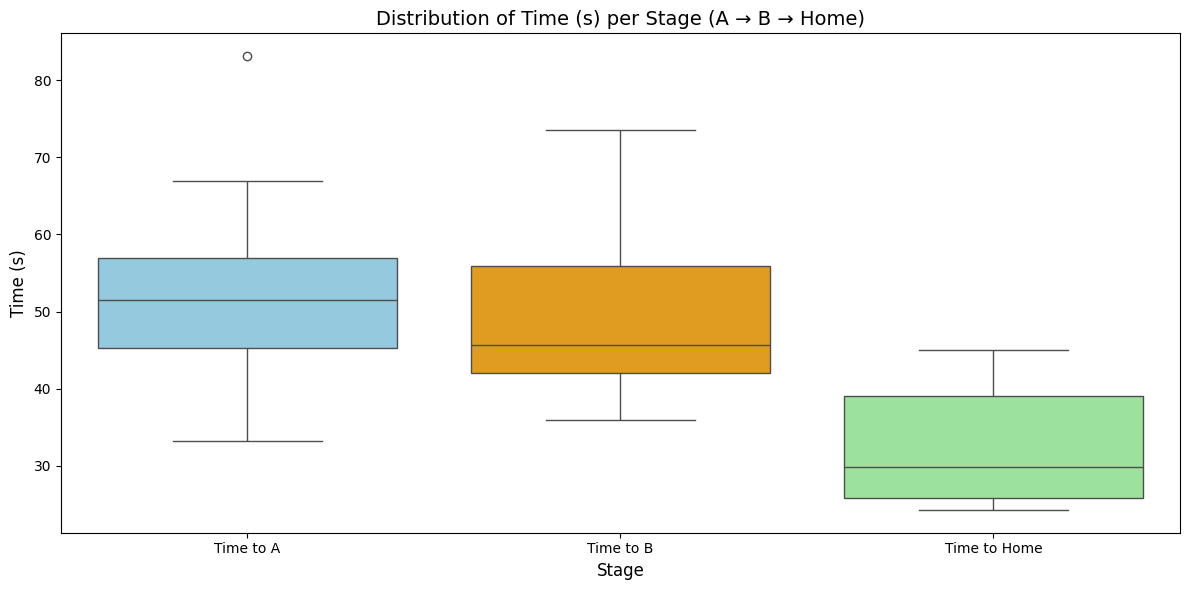

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=a_b_home_melted, x="Stage", y="Time", palette=["skyblue", "orange", "lightgreen"])

plt.title("Distribution of Time (s) per Stage (A → B → Home)", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

Movement Test: B to A to Home

In [13]:
print("Movement B to A to Home")
print("Stage: Mean - Median - Std - 95% CI")
print(f"Time to A (s): {calc_mean_median_std_ci(movement_b_a_home, 'Time to A')}")
print(f"Time to B (s): {calc_mean_median_std_ci(movement_b_a_home, 'Time to B')}")
print(f"Time to Home (s): {calc_mean_median_std_ci(movement_b_a_home, 'Time to Home')}")
print(f"Total (s): {calc_mean_median_std_ci(movement_b_a_home, 'Total')}")

Movement B to A to Home
Stage: Mean - Median - Std - 95% CI
Time to A (s): (24.39, 24.48, 4.17, 2.585)
Time to B (s): (28.5, 27.1, 5.06, 3.136)
Time to Home (s): (49.95, 47.57, 10.86, 6.731)
Total (s): (102.84, 105.11, 13.12, 8.132)


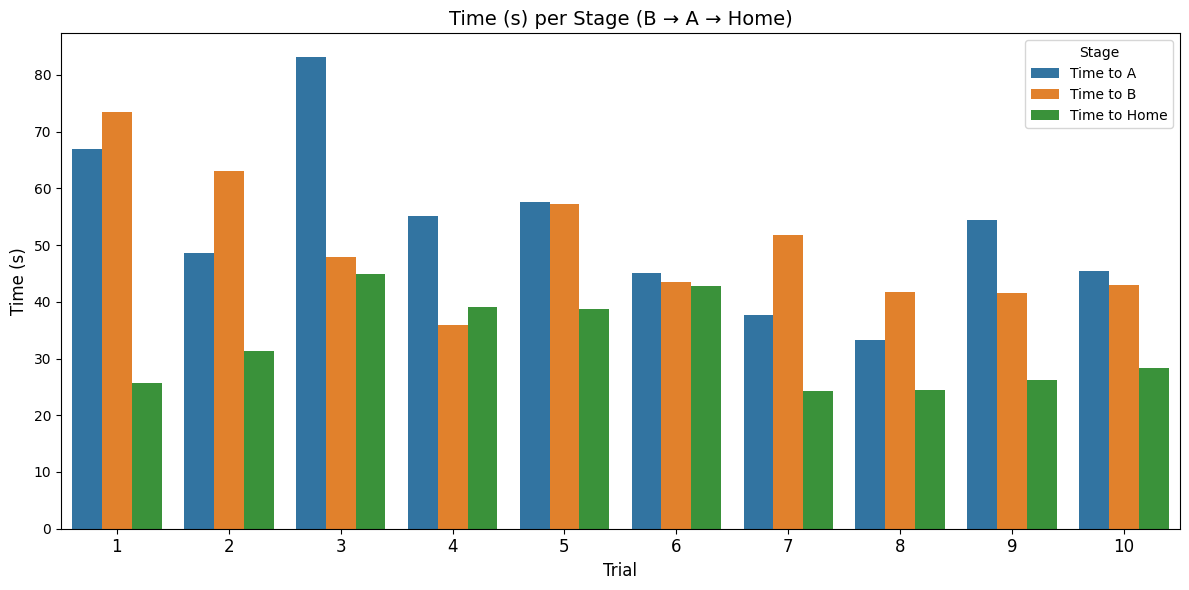

In [14]:
b_a_home_melted = movement_b_a_home[["Time to A", "Time to B", "Time to Home"]].melt(var_name="Stage", value_name="Time")

b_a_home_melted["Index"] = b_a_home_melted.groupby("Stage").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=a_b_home_melted, x="Index", y="Time", hue="Stage")

plt.title("Time (s) per Stage (B → A → Home)", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11), fontsize=12)
plt.tight_layout()
plt.show()

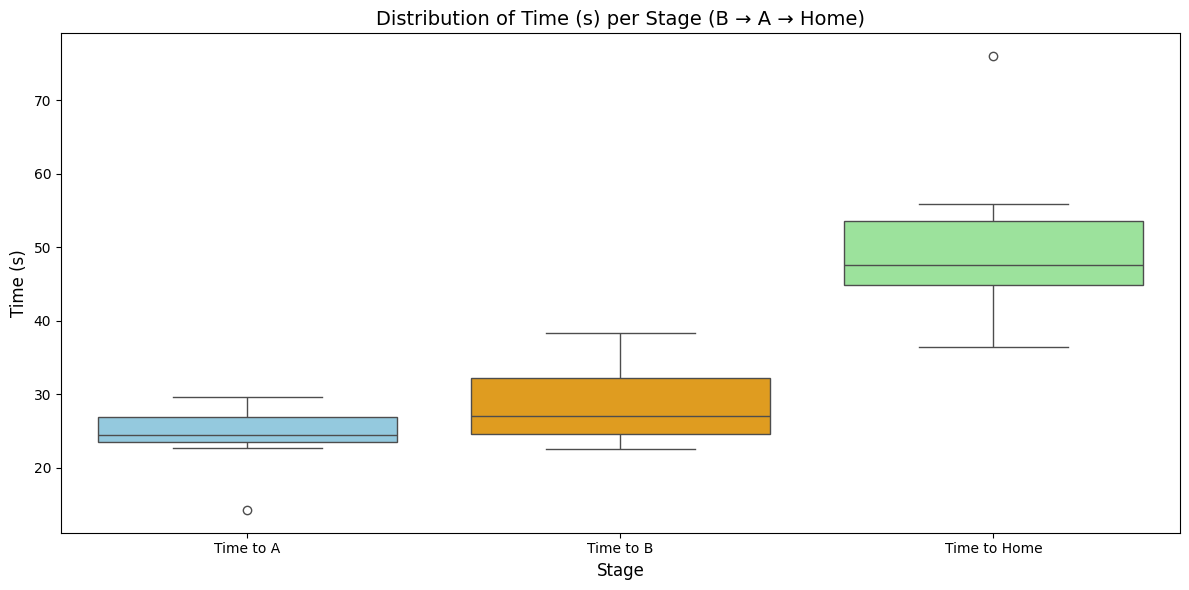

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=b_a_home_melted, x="Stage", y="Time", palette=["skyblue", "orange", "lightgreen"])

plt.title("Distribution of Time (s) per Stage (B → A → Home)", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

Movement Comparison

In [16]:
a_b_home_melted["Path"] = "B → A → Home"
b_a_home_melted["Path"] = "A → B → Home"

combined_melted = pd.concat([a_b_home_melted, b_a_home_melted], ignore_index=True)

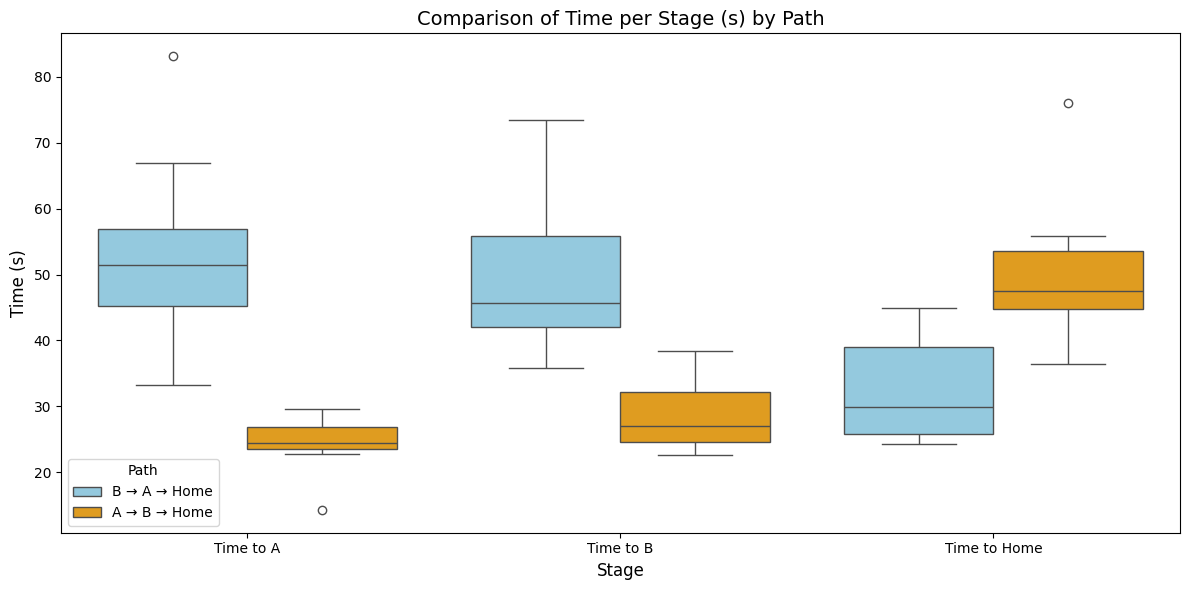

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_melted, x="Stage", y="Time", hue="Path", palette=["skyblue", "orange"])

plt.title("Comparison of Time per Stage (s) by Path", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)
plt.legend(title="Path")

plt.tight_layout()
plt.show()

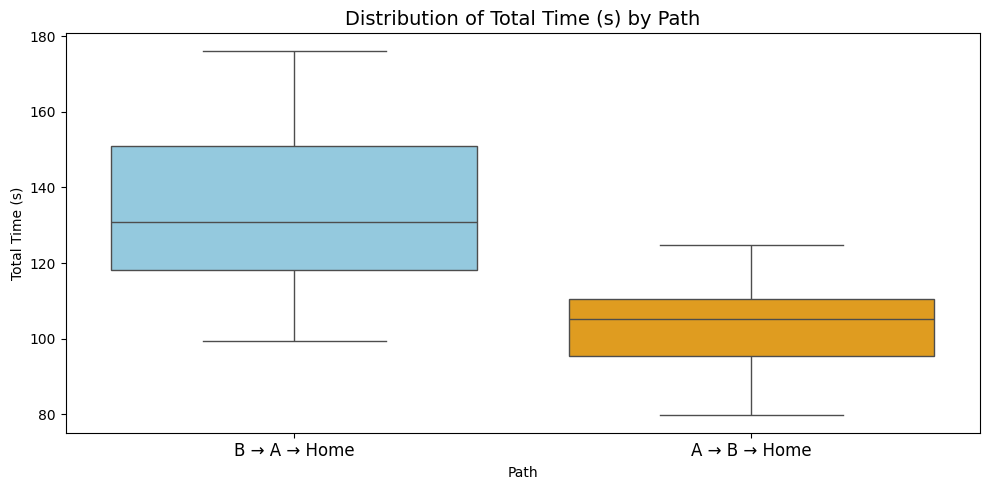

In [18]:
movement_compare = pd.DataFrame({
    "Total": pd.concat([movement_a_b_home["Total"], movement_b_a_home["Total"]], ignore_index=True),
    "Path": ["A → B → Home"] * len(movement_a_b_home) + ["B → A → Home"] * len(movement_b_a_home)
})

plt.figure(figsize=(10, 5))
sns.boxplot(data=movement_compare, x="Path", y="Total", palette=["skyblue", "orange"])
plt.ylabel("Total Time (s)")
plt.title("Distribution of Total Time (s) by Path", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["B → A → Home", "A → B → Home"], fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
stat, p = levene(movement_a_b_home["Total"], movement_b_a_home["Total"])
print(f"Levene's test p-value: {p:.4f}")

if (p < 0.05):
    print("The variance is not equal")
else:
    print("The variance is equal")

Levene's test p-value: 0.1236
The variance is equal


In [20]:
t_stat, p_value = ttest_ind(movement_a_b_home["Total"], movement_b_a_home["Total"], equal_var=True)

# Can use student's t-test because the variance is equal
print(f"Student's t-test results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means.")

Student's t-test results:
T-statistic: 3.702
P-value: 0.0016
Reject the null hypothesis: The means are significantly different.


Bot WebApp Integration Tests

In [21]:
bot_app_integration.columns

Index(['Trial ', 'Moving  ', 'Moving on App', 'Cleaning ', 'Cleaning on App',
       'Complete', 'Completed on App', 'Moving_diff', 'Cleaning_diff',
       'Complete_diff'],
      dtype='object')

In [22]:
print("Bot WebApp Integration Tests")
print("Status: Mean - Median - Std - 95% CI")
print(f"Moving (s): {calc_mean_median_std_ci(bot_app_integration, 'Moving  ')}")
print(f"Moving on App (s): {calc_mean_median_std_ci(bot_app_integration, 'Moving on App')}")
print(f"Cleaning (s): {calc_mean_median_std_ci(bot_app_integration, 'Cleaning ')}")
print(f"Cleaning on App (s): {calc_mean_median_std_ci(bot_app_integration, 'Cleaning on App')}")
print(f"Complete (s): {calc_mean_median_std_ci(bot_app_integration, 'Complete')}")
print(f"Completed on App (s): {calc_mean_median_std_ci(bot_app_integration, 'Completed on App')}")
print(f"Moving_diff (s): {calc_mean_median_std_ci(bot_app_integration, 'Moving_diff')}")
print(f"Cleaning_diff (s): {calc_mean_median_std_ci(bot_app_integration, 'Cleaning_diff')}")
print(f"Complete_diff (s): {calc_mean_median_std_ci(bot_app_integration, 'Complete_diff')}")


Bot WebApp Integration Tests
Status: Mean - Median - Std - 95% CI
Moving (s): (8.33, 8.39, 0.89, 0.78)
Moving on App (s): (8.58, 8.63, 0.87, 0.763)
Cleaning (s): (17.67, 15.28, 6.97, 6.109)
Cleaning on App (s): (19.05, 16.64, 6.98, 6.118)
Complete (s): (25.8, 26.65, 6.29, 5.513)
Completed on App (s): (25.96, 26.82, 6.27, 5.496)
Moving_diff (s): (0.25, 0.25, 0.02, 0.018)
Cleaning_diff (s): (1.38, 1.36, 0.06, 0.053)
Complete_diff (s): (0.16, 0.17, 0.06, 0.053)


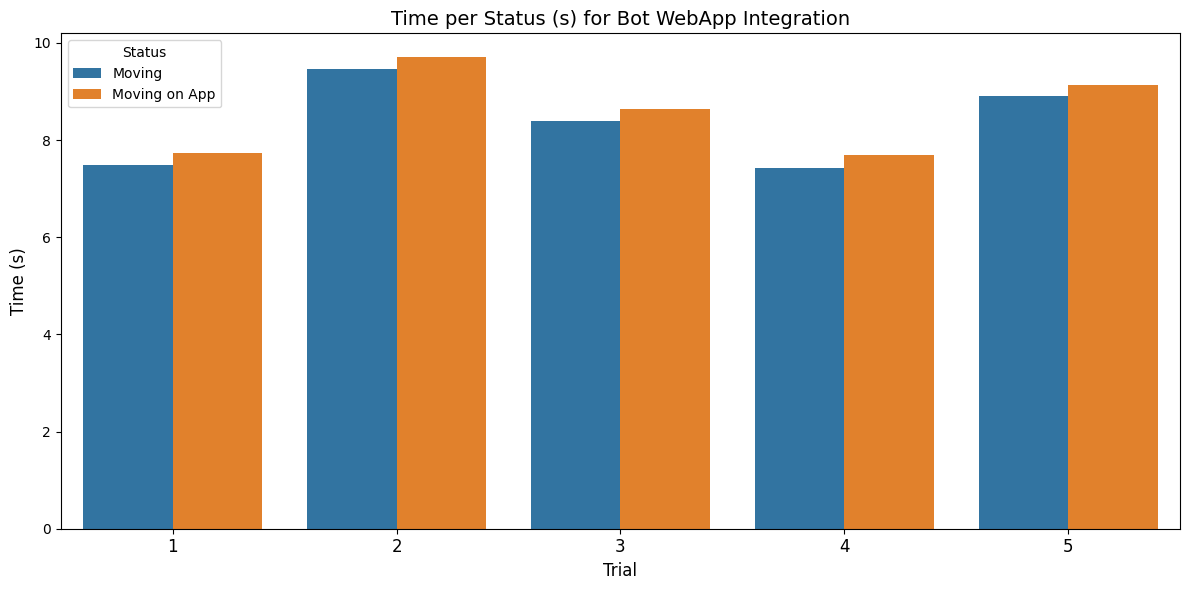

In [23]:
moving_app_melted = bot_app_integration[["Moving  ", "Moving on App"]].melt(var_name="Status", value_name="Time")
moving_app_melted["Status"] = moving_app_melted["Status"].str.strip()

moving_app_melted["Index"] = moving_app_melted.groupby("Status").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=moving_app_melted, x="Index", y="Time", hue="Status")

plt.title("Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.xticks(ticks=np.arange(5), labels=np.arange(1, 6), fontsize=12)
plt.tight_layout()
plt.show()

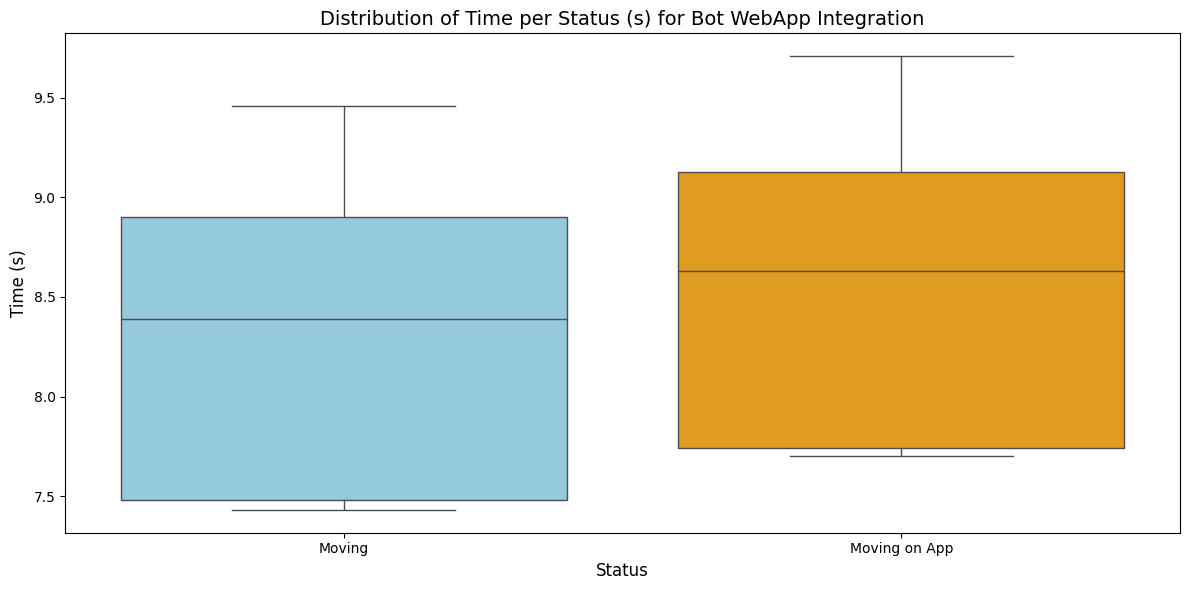

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=moving_app_melted, x="Status", y="Time", palette=["skyblue", "orange"])

plt.title("Distribution of Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

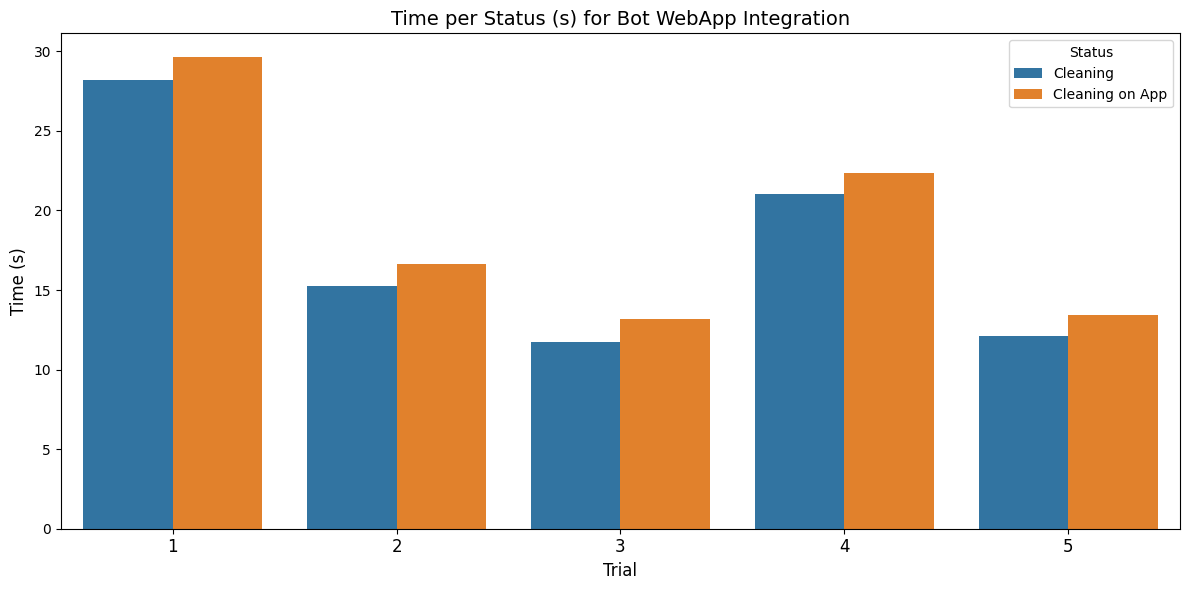

In [25]:
cleaning_app_melted = bot_app_integration[["Cleaning ", "Cleaning on App"]].melt(var_name="Status", value_name="Time")
cleaning_app_melted["Status"] = cleaning_app_melted["Status"].str.strip()

cleaning_app_melted["Index"] = cleaning_app_melted.groupby("Status").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=cleaning_app_melted, x="Index", y="Time", hue="Status")

plt.title("Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.xticks(ticks=np.arange(5), labels=np.arange(1, 6), fontsize=12)
plt.tight_layout()
plt.show()

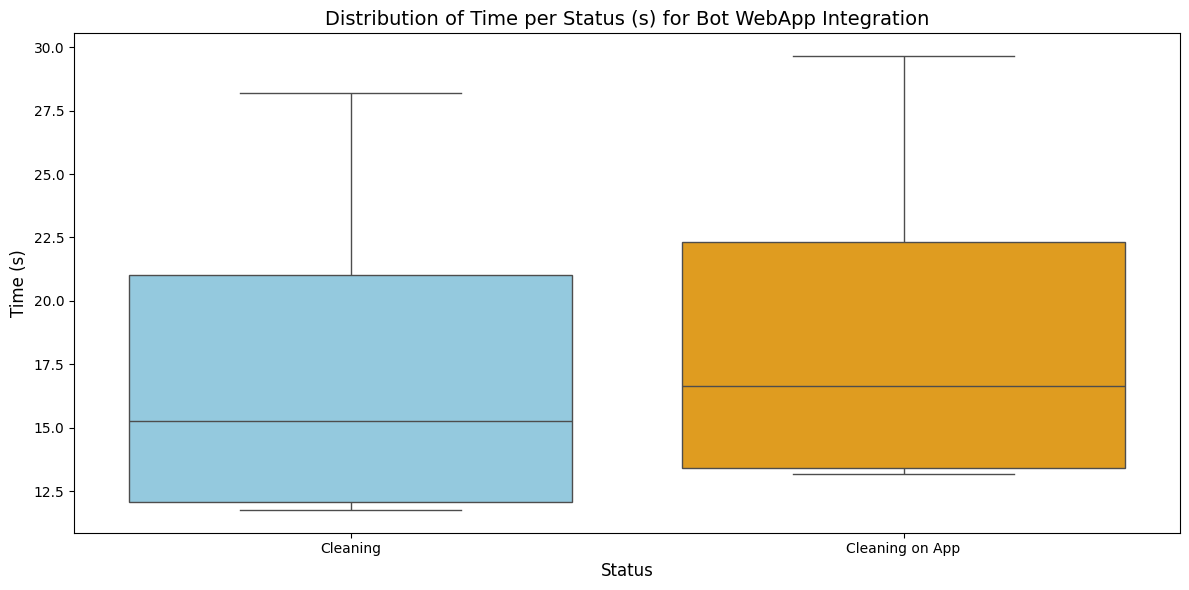

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaning_app_melted, x="Status", y="Time", palette=["skyblue", "orange"])

plt.title("Distribution of Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

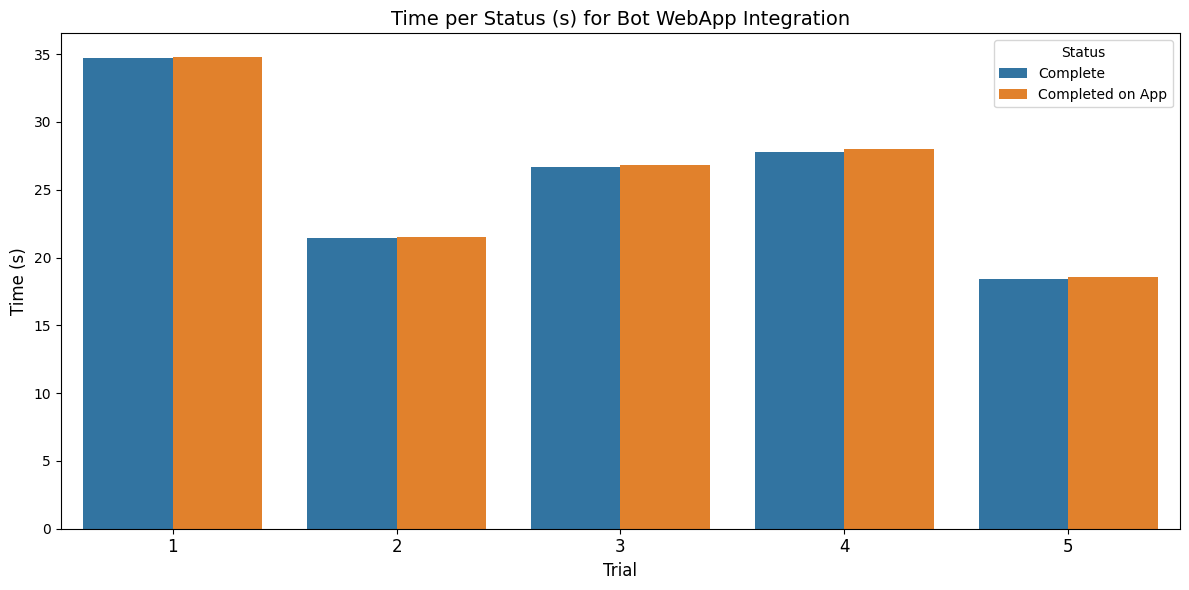

In [27]:
complete_app_melted = bot_app_integration[["Complete", "Completed on App"]].melt(var_name="Status", value_name="Time")

complete_app_melted["Index"] = complete_app_melted.groupby("Status").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=complete_app_melted, x="Index", y="Time", hue="Status")

plt.title("Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.xticks(ticks=np.arange(5), labels=np.arange(1, 6), fontsize=12)
plt.tight_layout()
plt.show()

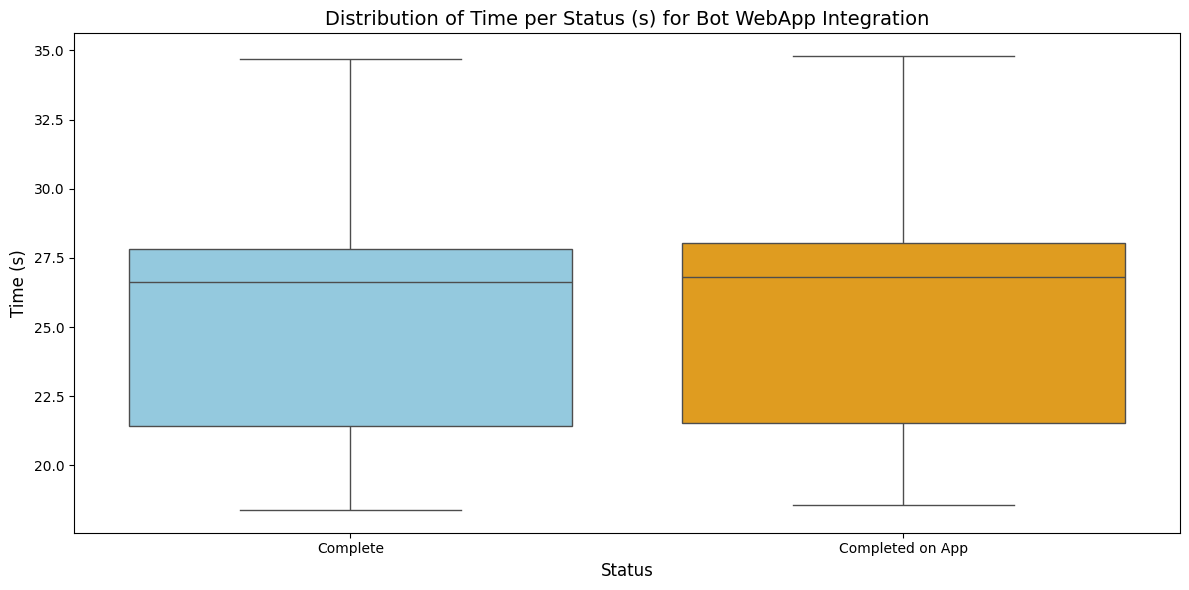

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=complete_app_melted, x="Status", y="Time", palette=["skyblue", "orange"])

plt.title("Distribution of Time per Status (s) for Bot WebApp Integration", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
bot_app_integration.columns = bot_app_integration.columns.str.strip()

actions_melted = pd.melt(
    bot_app_integration,
    value_vars=[
        "Moving", "Moving on App",
        "Cleaning", "Cleaning on App",
        "Complete", "Completed on App"
    ],
    var_name="Status",
    value_name="Time"
)

actions_melted["Source"] = actions_melted["Status"].apply(
    lambda x: "TurtleBot" if "on App" not in x else "WebApp"
)
actions_melted["Action"] = actions_melted["Status"].apply(
    lambda x: "Moving" if "Moving" in x else ("Cleaning" if "Cleaning" in x else "Complete")
)


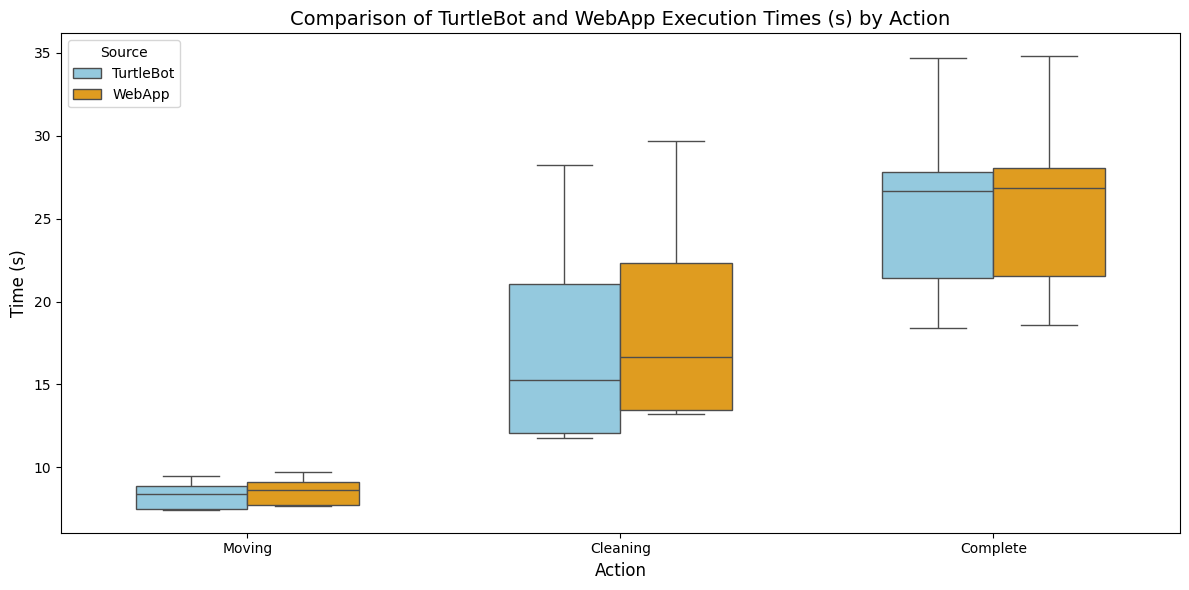

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=actions_melted,
    x="Action",
    y="Time",
    hue="Source",
    palette=["skyblue", "orange"],
    dodge=True,
    width=0.6
)

plt.title("Comparison of TurtleBot and WebApp Execution Times (s) by Action", fontsize=14)
plt.xlabel("Action", fontsize=12)
plt.ylabel("Time (s)", fontsize=12)
plt.legend(title="Source")

plt.tight_layout()
plt.show()


Cleaning Head Effectiveness

In [31]:
print("Cleaning Head Effectiveness")
print("Debris Type: Mean - Median - Std - 95% CI")
print(f"Smaller debris: {calc_mean_median_std_ci(cleaning_head_effectiveness, 'smaller debris')}")
print(f"Bigger debris: {calc_mean_median_std_ci(cleaning_head_effectiveness, 'bigger debris')}")

Cleaning Head Effectiveness
Debris Type: Mean - Median - Std - 95% CI
Smaller debris: (3.9, 4.0, 1.1, 0.682)
Bigger debris: (3.1, 3.0, 1.29, 0.8)


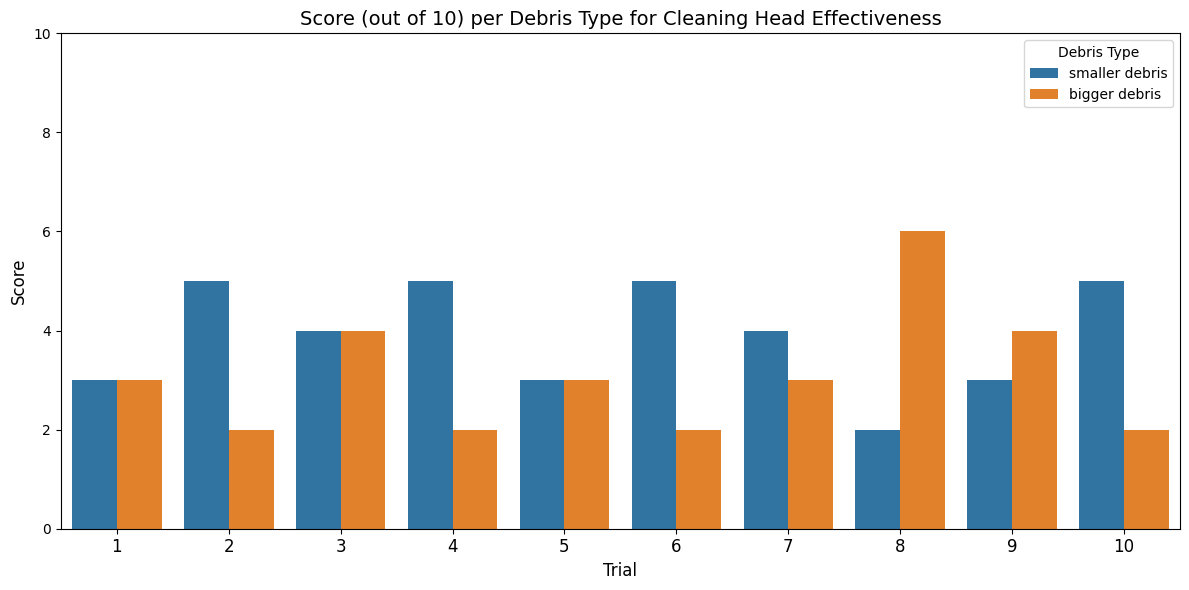

In [32]:
head_small_big_melted = cleaning_head_effectiveness[["smaller debris", "bigger debris"]].melt(var_name="Debris Type", value_name="Score")

head_small_big_melted["Index"] = head_small_big_melted.groupby("Debris Type").cumcount()

plt.figure(figsize=(12, 6))
sns.barplot(data=head_small_big_melted, x="Index", y="Score", hue="Debris Type")

plt.title("Score (out of 10) per Debris Type for Cleaning Head Effectiveness", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Score", fontsize=12)

plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11), fontsize=12)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

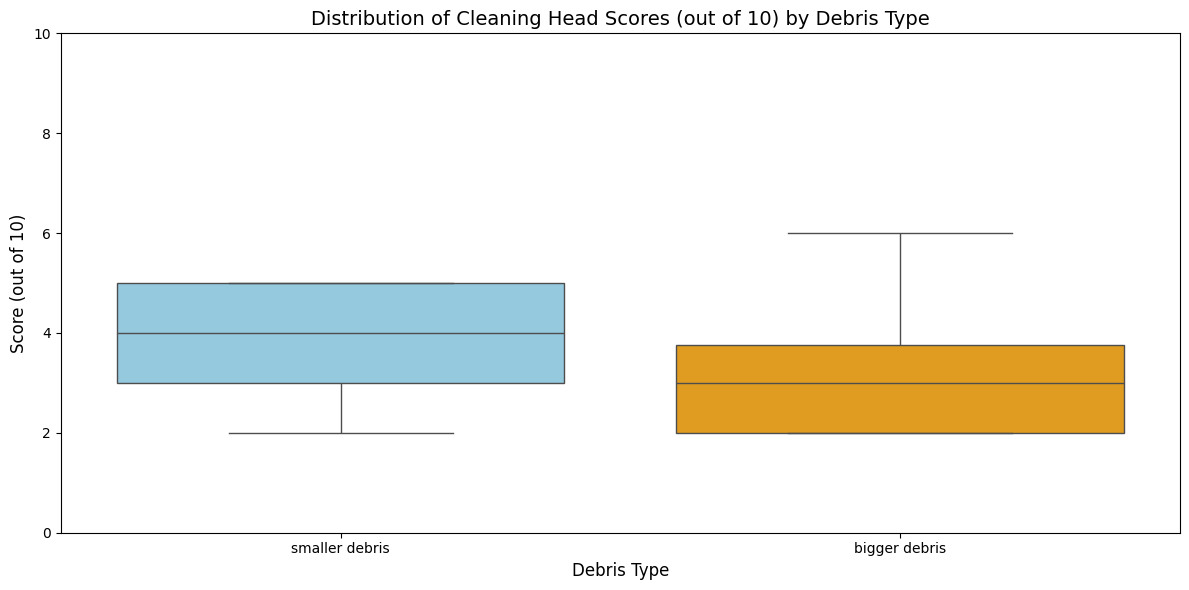

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=head_small_big_melted, x="Debris Type", y="Score", palette=["skyblue", "orange"])

plt.title("Distribution of Cleaning Head Scores (out of 10) by Debris Type", fontsize=14)
plt.xlabel("Debris Type", fontsize=12)
plt.ylabel("Score (out of 10)", fontsize=12)

plt.ylim(0, 10)

plt.tight_layout()
plt.show()

Rail Extension Tests

In [34]:
print("Rail Extension Tests")
print("Raw Error: +/-0.01 mm")
print("Status: Mean - Median - Std - 95% CI")
print(f"Length of rail on extension (mm): {calc_mean_median_std_ci(rail_extension, 'Length of rail on extension in mm')}")

Rail Extension Tests
Raw Error: +/-0.01 mm
Status: Mean - Median - Std - 95% CI
Length of rail on extension (mm): (98.38, 98.35, 0.17, 0.075)


Rail Retraction Tests

In [35]:
print("Rail Retraction Tests")
print("Raw Error: +/-0.01 mm")
print("Status: Mean - Median - Std - 95% CI")
print(f"Length of rail on retraction (mm): {calc_mean_median_std_ci(rail_retraction, 'Length of rail on retraction in mm')}")

Rail Retraction Tests
Raw Error: +/-0.01 mm
Status: Mean - Median - Std - 95% CI
Length of rail on retraction (mm): (98.28, 98.35, 0.23, 0.101)


In [36]:
stat, p = levene(rail_extension["Length of rail on extension in mm"], rail_retraction["Length of rail on retraction in mm"])
print(f"Levene's test p-value: {p:.4f}")

if (p < 0.05):
    print("The variance is not equal")
else:
    print("The variance is equal")

Levene's test p-value: 0.4783
The variance is equal


In [37]:
t_stat, p_value = ttest_ind(rail_extension["Length of rail on extension in mm"], rail_retraction["Length of rail on retraction in mm"], equal_var=True)

# Can use student's t-test because the variance is equal
print(f"Student's t-test results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means.")

Student's t-test results:
T-statistic: 1.545
P-value: 0.1305
Fail to reject the null hypothesis: No significant difference between the means.


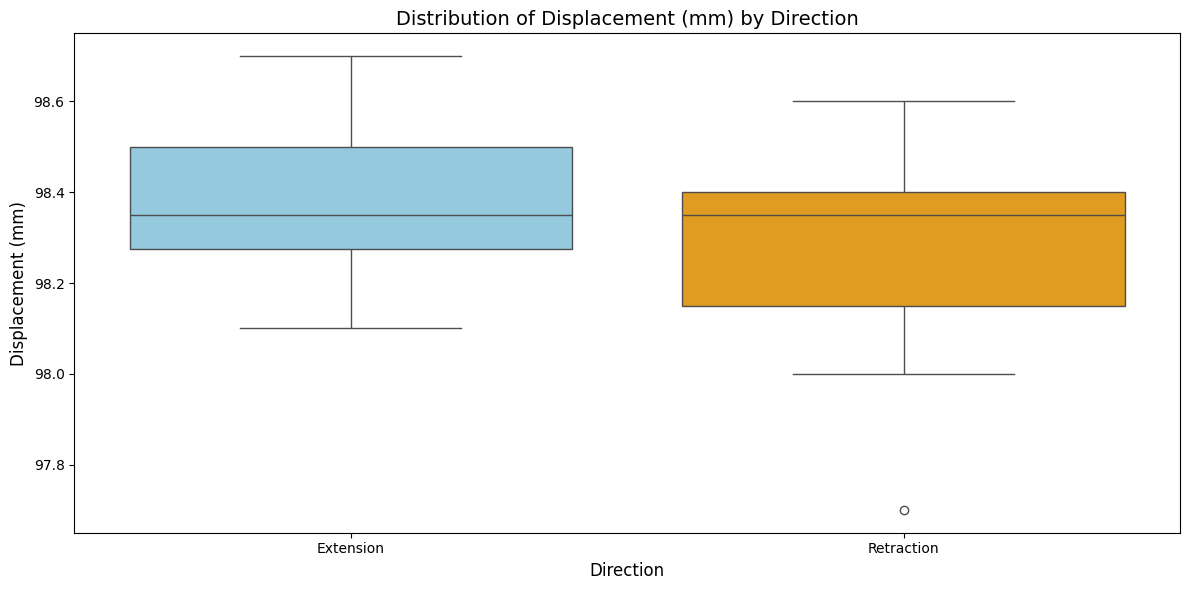

In [38]:
rail_compare = pd.DataFrame({
    "Direction": ["Extension"] * len(rail_extension) + ["Retraction"] * len(rail_retraction),
    "Total": pd.concat([
        rail_extension["Length of rail on extension in mm"],
        rail_retraction["Length of rail on retraction in mm"]
    ], ignore_index=True)
})


plt.figure(figsize=(12, 6))
sns.boxplot(data=rail_compare, x="Direction", y="Total", palette=["skyblue", "orange"])
plt.ylabel("Displacement (mm)", fontsize=12)
plt.xlabel("Direction", fontsize=12)
plt.title("Distribution of Displacement (mm) by Direction", fontsize=14)
plt.tight_layout()
plt.show()